<a href="https://colab.research.google.com/github/misiek98/cv/blob/master/3.skaner_dokumentow/1.detekcja_obiektow_prostokatnych_smartfon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab.patches import cv2_imshow
!pip install opencv-python==4.5.3.56
import cv2
import imutils
cv2.__version__

'4.5.3'

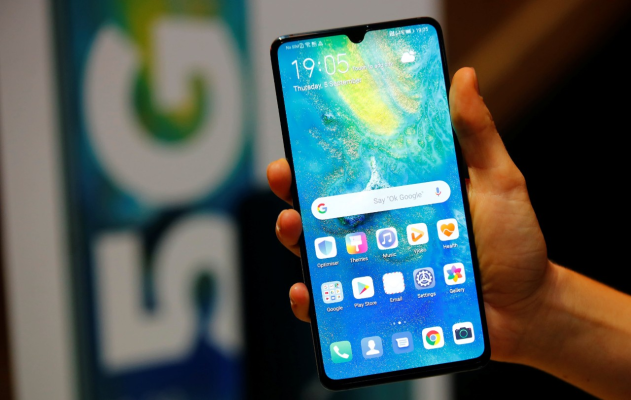

In [4]:
image = cv2.imread(r'/content/phone.jpg')
image = imutils.resize(image, height=400)
cv2_imshow(image)

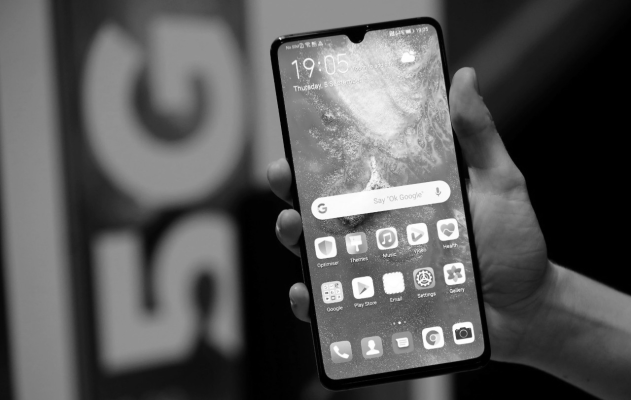

In [5]:
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayImage)

### WYKRYWANIE KRAWĘDZI

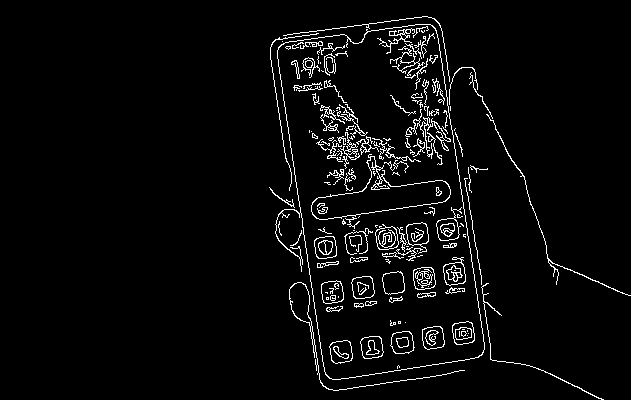

In [6]:
edges1 = cv2.Canny(grayImage,70,200)
cv2_imshow(edges1)

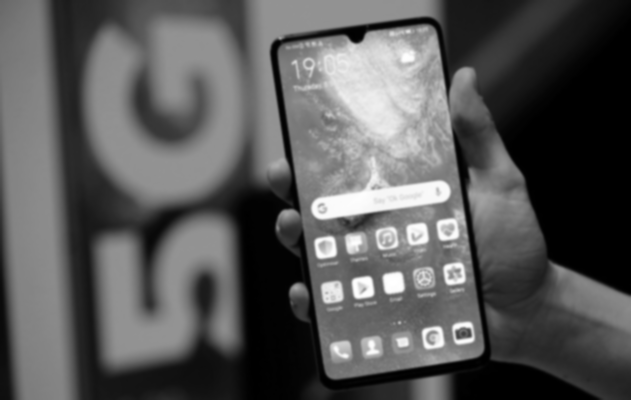

In [7]:
grayImage = cv2.GaussianBlur(src=grayImage, ksize=(5,5), sigmaX=0)
cv2_imshow(grayImage)

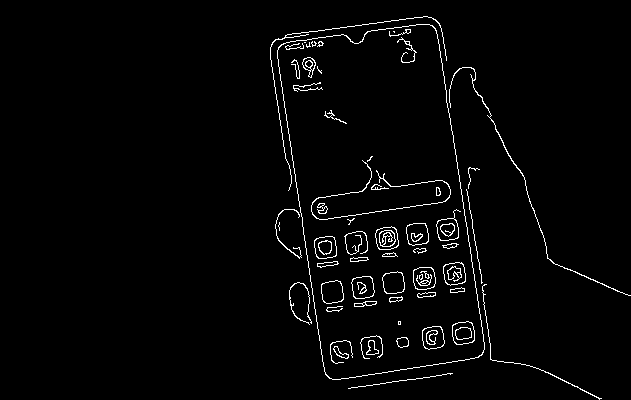

In [8]:
edges = cv2.Canny(grayImage, 70, 200)
cv2_imshow(edges)

### DETEKCJA KONTURU

In [9]:
contours = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

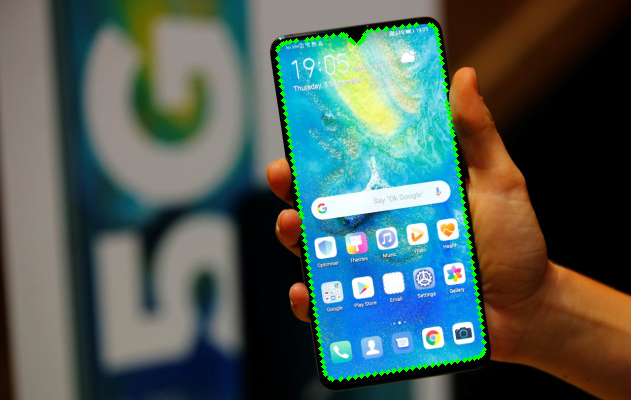

In [14]:
# Jeśli parametr contours podamy tak jak niżej, wtedy zwrócone zostaną punkty. 
# Jeśli chcemy je połączyć, parametr podajemy jako listę - [contours[0]]

cnt1 = cv2.drawContours(image.copy(), contours[0], contourIdx=-1, color=(0,255,0), thickness=3)
cv2_imshow(cnt1)

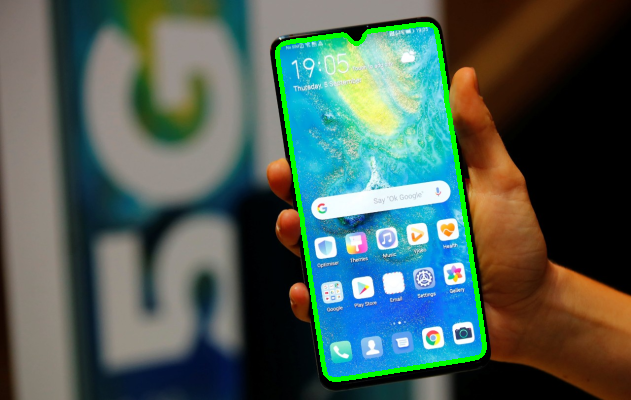

In [15]:
# Jeśli parametr contours podamy tak jak niżej, wtedy zwrócone zostaną punkty. 
# Jeśli chcemy je połączyć, parametr podajemy jako listę - [contours[0]]

cnt1 = cv2.drawContours(image.copy(), [contours[0]], contourIdx=-1, color=(0,255,0), thickness=3)
cv2_imshow(cnt1)

### Kolejne kontury

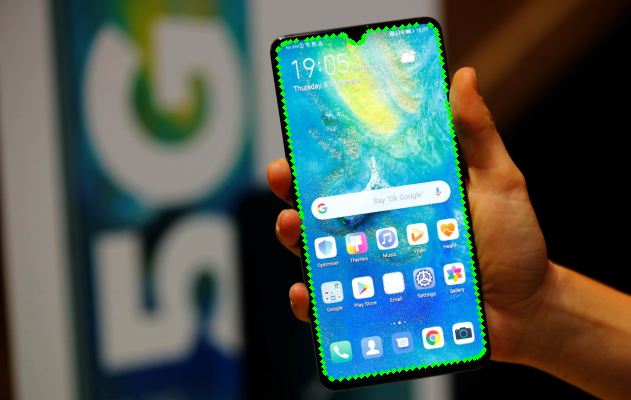

In [11]:
cnt2 = cv2.drawContours(image.copy(), contours[1], contourIdx=-1, color=(0,255,0), thickness=3)
cv2_imshow(cnt2)

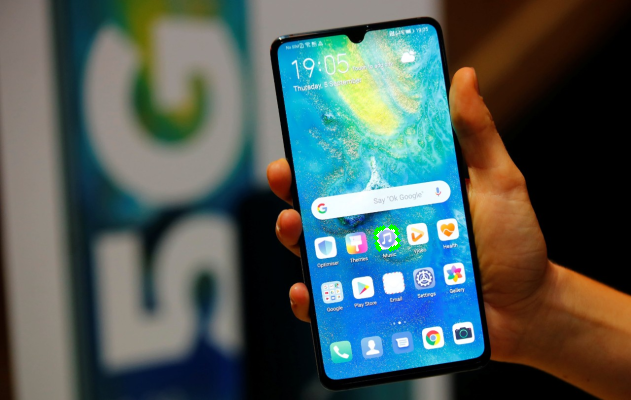

In [12]:
cnt3 = cv2.drawContours(image.copy(), contours[2], contourIdx=-1, color=(0,255,0), thickness=3)
cv2_imshow(cnt3)

# DETEKCJA PROSTOKĄTA

In [16]:
screen_contour = None

# Pętla przechodzi po każdym wcześniej wykrytym konturze (10 o największym polu, patrz contours)
# approx to aproksymacja konturu, funkcja zwraca aproksymację wykrytego konturu
# Jeżeli figura będzie miała 4 wierzchołki, wtedy do tej zmiennej przypisze się aproksymację

for contour in contours:
  perimeter = cv2.arcLength(curve=contour, closed=True)
  approx = cv2.approxPolyDP(curve=contour, epsilon=0.015 * perimeter, closed=True)

  if len(approx) == 4:
    screen_contour = approx
    break

In [18]:
# Tablica numpy wykrytych wierzchołków
screen_contour

array([[[429,  24]],

       [[277,  50]],

       [[332, 379]],

       [[484, 349]]], dtype=int32)

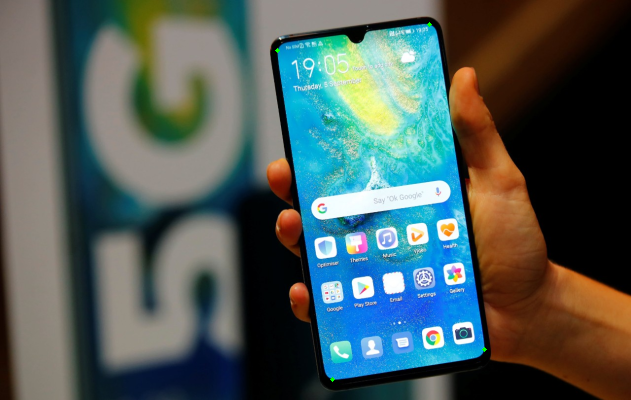

In [19]:
vertices = cv2.drawContours(image=image.copy(), contours=screen_contour, contourIdx=-1, color=(0, 255, 0), thickness=3)
cv2_imshow(vertices)

### WYŚWIETLENIE ZNALEZIONEGO KSZTAŁTU

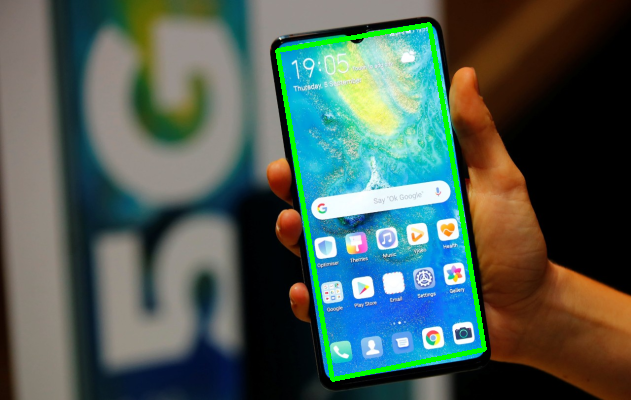

In [20]:
# Aby połączyć te punkty wystarczy parametr contours przesłać jako listę
vertices = cv2.drawContours(image=image.copy(), contours=[screen_contour], contourIdx=-1, color=(0, 255, 0), thickness=3)
cv2_imshow(vertices)